In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os, sys

# Relative paths
dirname = os.path.dirname
sep = os.sep

ml_folder = dirname(os.getcwd())
sys.path.append(ml_folder)

from src.utils import mining_data_tb as md
from src.utils import visualization_tb as vi

import warnings

warnings.filterwarnings("ignore")

In [2]:
dietary_dfs = md.read_data(2, "2_dietary")

In [3]:
for name, df in dietary_dfs.items():
    print(name, df.shape)

dr1tot_j (8704, 167)
dr1tot_i (9544, 167)
dr1tot_h (9813, 167)
dr2tot_i (9544, 84)
dr2tot_h (9813, 84)
dr2tot_j (8704, 84)


In [4]:
variable_names = pd.read_csv("../data/6_variables/0_final_variables.csv", index_col = 0)

cond1 = variable_names["file_name"] == "DR1TOT_J"
cond2 = variable_names["file_name"] == "DR2TOT_J"

filter1 = list(variable_names[cond1]["vAr_nAmE"].values)
filter2 = list(variable_names[cond2]["vAr_nAmE"].values)

In [5]:
dr1tot_i = dietary_dfs["dr1tot_i"].loc[:, filter1]
dr1tot_j = dietary_dfs["dr1tot_j"].loc[:, filter1]
dr1tot_h = dietary_dfs["dr1tot_h"].loc[:, filter1]

dr2tot_i = dietary_dfs["dr2tot_i"].loc[:, filter2]
dr2tot_j = dietary_dfs["dr2tot_j"].loc[:, filter2]
dr2tot_h = dietary_dfs["dr2tot_h"].loc[:, filter2]

In [7]:
dr1tot = pd.concat([dr1tot_h, dr1tot_i, dr1tot_j])
dr2tot = pd.concat([dr2tot_h, dr2tot_i, dr2tot_j])

print(dr1tot.shape)
print(dr1tot.info())
print("#" * 50)
print(dr2tot.shape)
print(dr2tot.info())
print("#" * 50)

(28061, 46)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28061 entries, 73557 to 102956
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DR1TALCO  24342 non-null  float64
 1   DR1TATOA  24342 non-null  float64
 2   DR1TATOC  24342 non-null  float64
 3   DR1TB12A  24342 non-null  float64
 4   DR1TBCAR  24342 non-null  float64
 5   DR1TCAFF  24342 non-null  float64
 6   DR1TCALC  24342 non-null  float64
 7   DR1TCARB  24342 non-null  float64
 8   DR1TCHL   24342 non-null  float64
 9   DR1TCHOL  24342 non-null  float64
 10  DR1TCOPP  24342 non-null  float64
 11  DR1TCRYP  24342 non-null  float64
 12  DR1TFA    24342 non-null  float64
 13  DR1TFDFE  24342 non-null  float64
 14  DR1TFF    24342 non-null  float64
 15  DR1TFIBE  24342 non-null  float64
 16  DR1TFOLA  24342 non-null  float64
 17  DR1TIRON  24342 non-null  float64
 18  DR1TKCAL  24342 non-null  float64
 19  DR1TLYCO  24342 non-null  float64
 20  DR1TLZ    2

It seems like we have no missing values, although the variables WTDRD1 and WTDR2D have always more non-null values than the rest. Let's check this out.

Now everything seems fine.

for name, df in dietary_dfs_2.items():
    print(name, "\n")
    print(df.describe())
    print("#" * 50)

In [10]:
dietary_dfs_2["dr1tot_h"].shape

(8531, 46)

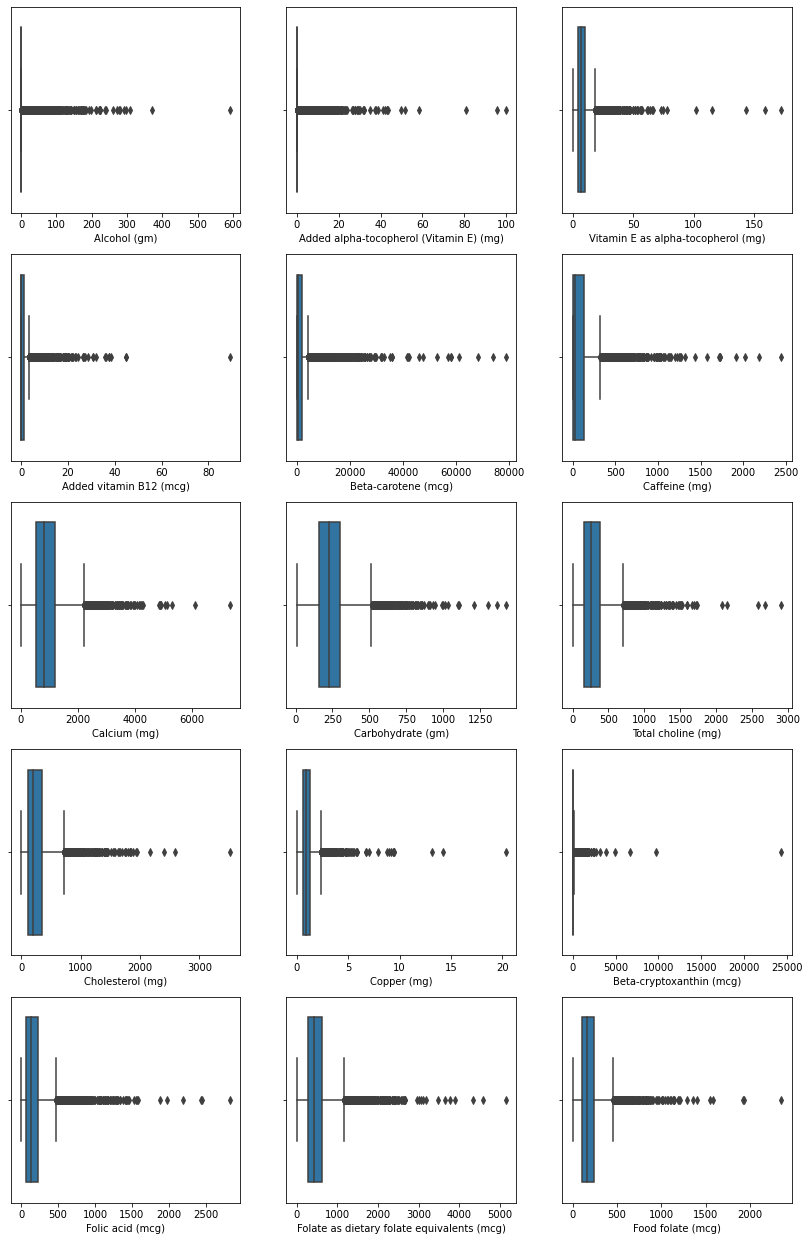

In [11]:
vi.multi_axes_plotter(dietary_dfs_2["dr1tot_h"].iloc[:, :15], 3, "box", (14, 22), variable_names)
plt.show()

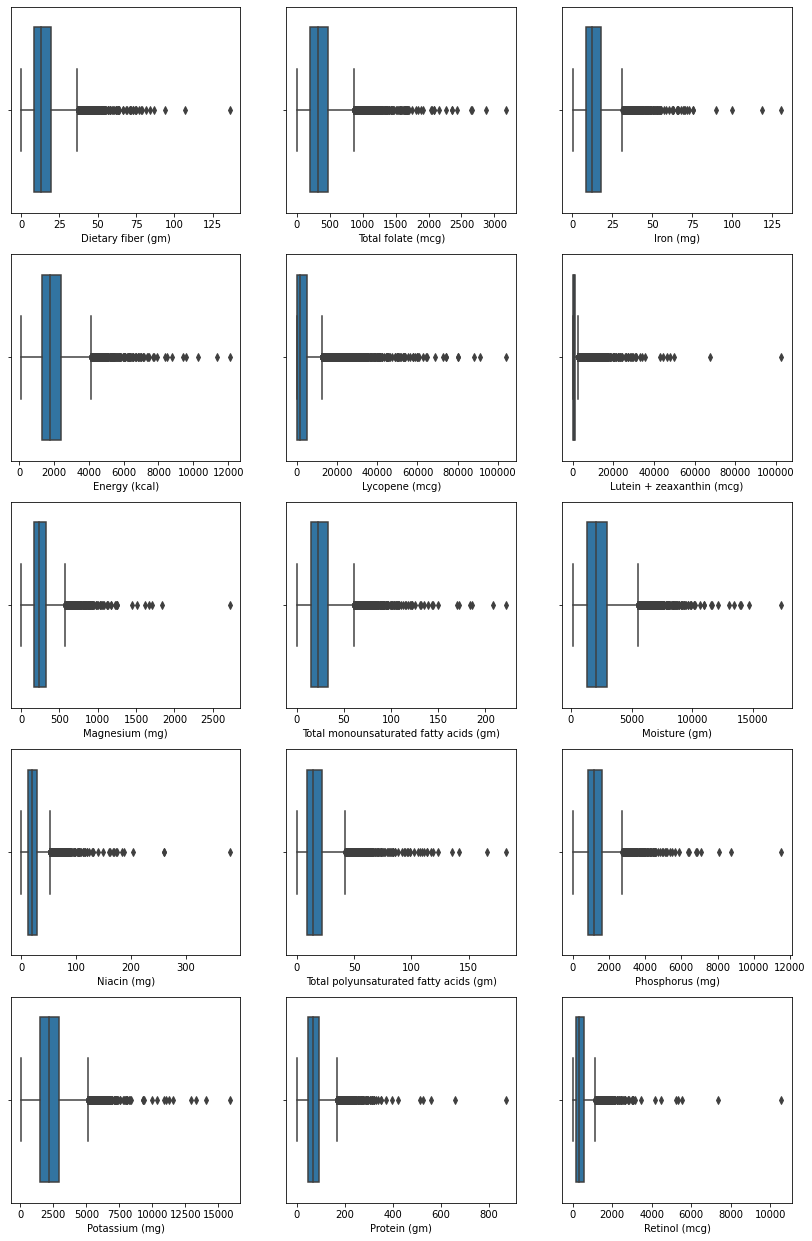

In [19]:
vi.multi_axes_plotter(dietary_dfs_2["dr1tot_h"].iloc[:, 15:30], 3, "box", (14, 22), variable_names)
plt.show()

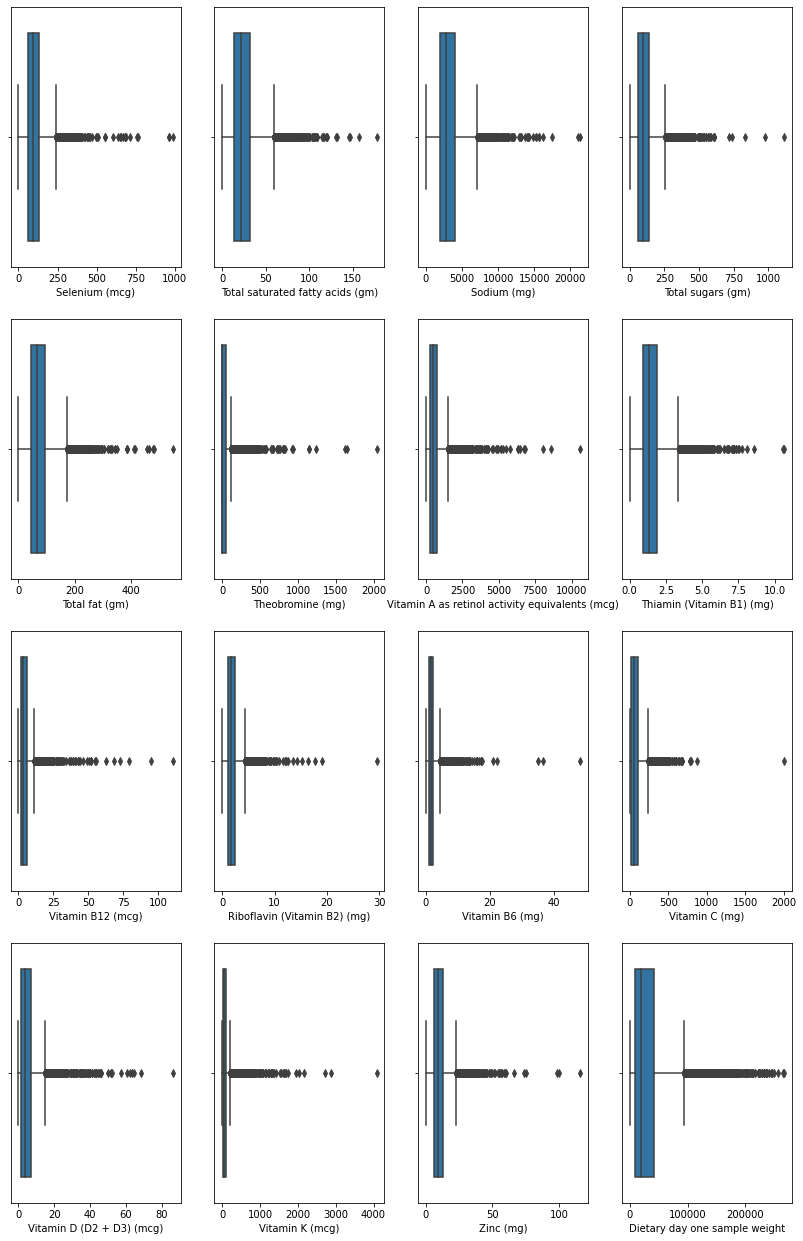

In [20]:
vi.multi_axes_plotter(dietary_dfs_2["dr1tot_h"].iloc[:, 30:46], 4, "box", (14, 22), variable_names)
plt.show()

Well, I have quite a few outliers. I'll check this further later seeing the correlation between all the values and the diseases I want to predict.

In [18]:
dietary_dfs_2 = {"dr1tot_i" : dr1tot_i, "dr1tot_j" : dr1tot_j, "dr1tot_h" : dr1tot_h, "dr2tot_i" : dr2tot_i, "dr2tot_j" : dr2tot_j, "dr2tot_h" : dr2tot_h}

for name, df in dietary_dfs_2.items():
    print("\n", name, "\n")
    print(df.describe())
    print("#" * 50)


 dr1tot_i 

          DR1TALCO     DR1TATOA     DR1TATOC     DR1TB12A       DR1TBCAR  \
count  8327.000000  8327.000000  8327.000000  8327.000000    8327.000000   
mean      5.785457     0.811208     7.946798     1.001356    1828.227093   
std      21.967410     3.283781     6.029624     2.503279    3841.041089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.000000     0.000000     4.220000     0.000000     213.000000   
50%       0.000000     0.000000     6.560000     0.000000     564.000000   
75%       0.000000     0.000000     9.940000     1.190000    1682.000000   
max     831.600000    62.700000   112.330000    49.650000  116313.000000   

          DR1TCAFF     DR1TCALC     DR1TCARB      DR1TCHL     DR1TCHOL  ...  \
count  8327.000000  8327.000000  8327.000000  8327.000000  8327.000000  ...   
mean     91.270566   913.209079   237.653499   298.952816   270.264921  ...   
std     168.469036   569.738075   117.053230   189.500156   234.2